In [4]:
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import os
import numpy as np

working_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI"
data_dir = "/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos"


In [58]:
# Leer datos
# df=pd.read_csv("/Users/upar/Library/CloudStorage/OneDrive-UniversidaddelosAndes/03 MONEY/CESED/ANDI/Datos/3-AnalysisData/delitos_por_upz.csv")
df = pd.read_csv("~/Downloads/base.csv")
# Sacar columnas que graficaremos
# df=df[['ESTRATO_mean','NOMBRE_UPZ','tasa_violencia_intrafamiliar_2018']]
df.head()

# borrar observación rara
print(df.shape)
df=df.set_index('NOMBRE_UPZ').drop(labels='EL MOCHUELO')

(114, 4)


In [59]:
df=df.sort_values(by='ESTRATO_mean', ascending=True)

# Run linear regression
ols_result = sm.OLS(df['tasa_violencia_intrafamiliar_2018'], sm.add_constant(df[['ESTRATO_mean']])).fit()

# Get slope coefficient
slope = ols_result.params['ESTRATO_mean']
slope_se = ols_result.bse['ESTRATO_mean']
slope_p = ols_result.pvalues['ESTRATO_mean']

/var/folders/gh/2cf49j_x4q533sfszrhs7szc0000gn/T/ipykernel_49446/4076440951.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('cividis')


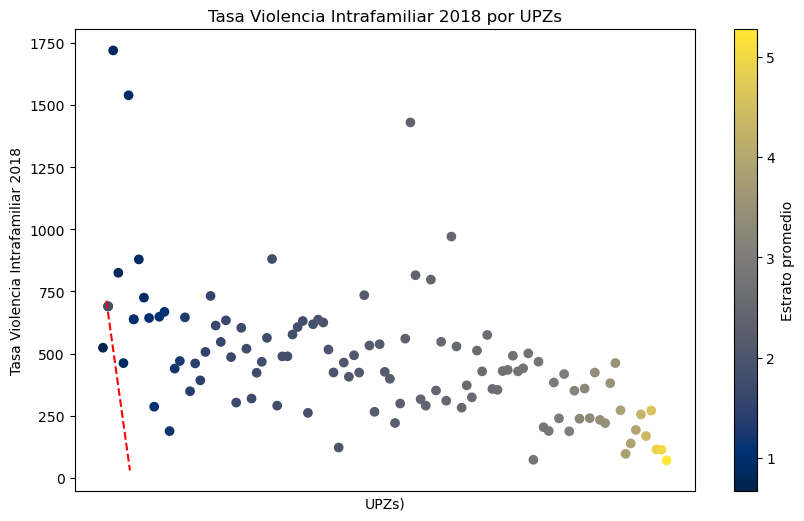

In [60]:
# Sort the DataFrame by 'population_density' in descending order
df_sorted = df.sort_values(by='ESTRATO_mean', ascending=True)

# Create a colormap for coloring points based on population density
colormap = plt.cm.get_cmap('cividis')

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
scatter = plt.scatter(df_sorted.index, df_sorted['tasa_violencia_intrafamiliar_2018'], c=df_sorted['ESTRATO_mean'], cmap=colormap)

# Add the linear regression line to the plot
b0, b1 = ols_result.params

# Calculate the linear regression line
x_fit = np.linspace(df['ESTRATO_mean'].min(), df['ESTRATO_mean'].max(), 100)
y_fit = b0 + b1 * x_fit


plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression')


# Add labels and a colorbar
plt.xlabel('UPZs)')
plt.ylabel('Tasa Violencia Intrafamiliar 2018')
plt.title('Tasa Violencia Intrafamiliar 2018 por UPZs')
plt.colorbar(scatter, label='Estrato promedio')

# Show the plot
plt.xticks([])  # Hide x-axis labels
plt.show()


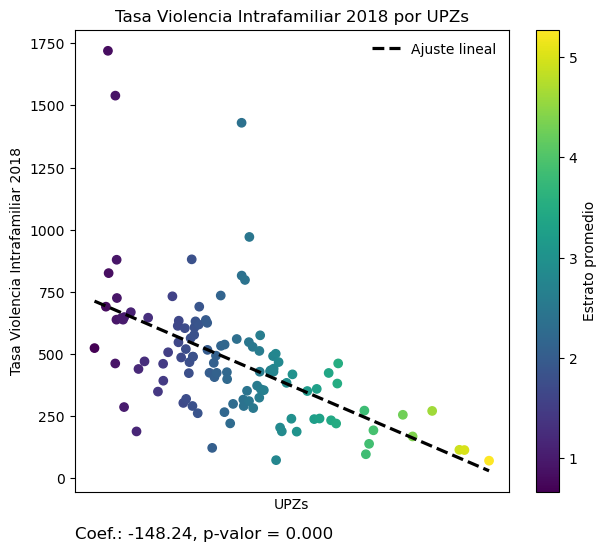

In [77]:
# Sort the DataFrame by 'population_density' in descending order
df_sorted = df.sort_values(by='ESTRATO_mean', ascending=True)

# Create a colormap for coloring points based on population density
colormap = plt.colormaps.get_cmap('viridis')

# Create a scatter plot
plt.figure(figsize=(7, 6))  # Adjust the figure size as needed
scatter = plt.scatter(df['ESTRATO_mean'], df_sorted['tasa_violencia_intrafamiliar_2018'], c=df_sorted['ESTRATO_mean'], cmap=colormap)

# Add the linear regression line to the plot
b0, b1 = ols_result.params

# Calculate the linear regression line
x_fit = np.linspace(df['ESTRATO_mean'].min(), df['ESTRATO_mean'].max(), 100)
y_fit = b0 + b1 * x_fit


plt.plot(x_fit, y_fit, color='black', linestyle='--', label='Ajuste lineal',linewidth=2.3)


# Add labels and a colorbar
plt.xlabel('UPZs')
plt.ylabel('Tasa Violencia Intrafamiliar 2018')
plt.title('Tasa Violencia Intrafamiliar 2018 por UPZs')
plt.colorbar(scatter, label='Estrato promedio')

# Add the caption
slope_caption = f'Coef.: {b1:.2f}, p-valor = {ols_result.pvalues[1]:.3f}'
plt.annotate(slope_caption, xy=(0.00, -0.1), xycoords='axes fraction', fontsize=12)


# Show the plot
plt.xticks([])  # Hide x-axis labels
plt.legend(frameon=False)
plt.savefig("arepita_666.png")
plt.show()

In [185]:
#--------------------------------------------------------------------------------------------
# Define function to plot scatter plots with regression line
#--------------------------------------------------------------------------------------------

def graph(df, x:str, y:str, title:str, xlabel:str, ylabel:str, colbarlbl:str, filename:str):
    # Sort the DataFrame by 'population_density' in descending order
    df_sorted = df.sort_values(by=x, ascending=True)

    # Create a colormap for coloring points based on population density
    colormap = plt.colormaps.get_cmap('viridis')

    # Create a scatter plot
    plt.figure(figsize=(7, 6))  # Adjust the figure size as needed
    scatter = plt.scatter(df_sorted[x], df_sorted[y], c=df_sorted[x], cmap=colormap)

    
    # Run linear regression
    ols_result = sm.OLS(df[y], sm.add_constant(df[[x]]), missing='drop').fit()
    b0, b1 = ols_result.params
      

    # Calculate the linear regression line
    x_fit = np.linspace(df[x].min(), df[x].max(), 100)
    y_fit = b0 + b1 * x_fit

    # Add the linear regression line to the plot
    plt.plot(x_fit, y_fit, color='black', linestyle='--', label='Ajuste lineal',linewidth=2.3)

    # Add the caption
    slope_caption = f'Coeficiente: {b1:.2f}, p-valor = {ols_result.pvalues[1]:.3f}'
    plt.annotate(slope_caption, xy=(0.00, -0.15), xycoords='axes fraction', fontsize=12)

    # Add labels and a colorbar
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(frameon=False)
    plt.colorbar(scatter, label=colbarlbl)
    plt.xticks([])  # Hide x-axis labels
    
    # Save the plot to a file
    my_path = os.path.abspath("../Output/Graficas 1/")
    plt.savefig(my_path + f'/{filename}.png', bbox_inches='tight')
    # plt.close()

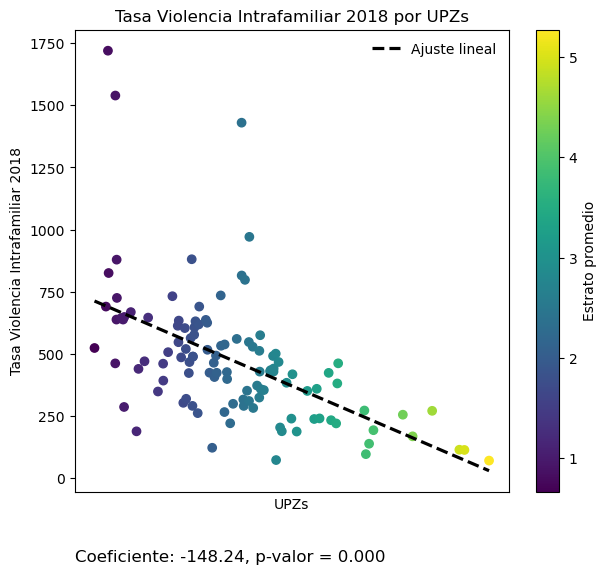

In [133]:
graph(df, x='ESTRATO_mean', y='tasa_violencia_intrafamiliar_2018', title='Tasa Violencia Intrafamiliar 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa Violencia Intrafamiliar 2018', colbarlbl='Estrato promedio', filename="tasa_violencia_intrafamiliar_2018")

# Manzana
Vamos a nombrar los archivos de gráficos de la siguiente forma: `d_YYYY_u_x.jpg` en donde:

- `d`: Delito 
- `YYYY`: Año
- `u`: Unidad de análisis (UPZ, Scatastral, manzana, ...)
- `x`: Variable explicativa (e,g, estrato promedio, etc.)

# Sector Catastral


In [242]:
# Load data
df_scatastral=gpd.read_file(f"{data_dir}/3-AnalysisData/Bases listas/scatastral.gpkg")

# UPZs

In [41]:
# Fix the aggregation level of analysis
df_upz = gpd.read_file(f"{data_dir}/3-AnalysisData/Bases listas/upz.gpkg")

******************************************************************************
******************************************************************************
# 1. Delitos Sexuales



In [154]:
s_delito = 'delitos_sexuales'
Ys=[i for i in df_upz.columns if (f"{s_delito}" in i) and ('tasa' in i)]
year=2018
Ys

['tasa_delitos_sexuales_2018']

## Sector Catastral
No se puede dado que no hay datos para el 2019 de delitos sexuales a nivel sector catastral.

## UPZ

In [155]:
unidad = "upz"

### Estrato

In [46]:
[i for i in df_upz.columns if ("ESTRATO" in i)]

['ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_median', 'ESTRATO_stddev']

In [161]:
XVAR='ESTRATO_mean'
df_upz.set_index('CODIGO_UPZ', inplace=True)

In [143]:
df_upz.sort_values(by='tasa_delitos_sexuales_2018', ascending=False)[['nombre','tasa_delitos_sexuales_2018','2018']]
# df_upz.iloc[63]['2018'],df_upz.iloc[63]['delitos_sexuales_2018'],df_upz.iloc[63]['tasa_delitos_sexuales_2018']

nombre  tasa_delitos_sexuales_2018   2018
CODIGO_UPZ                                                               
63                         EL MOCHUELO                    11111.11     36
117               AEROPUERTO EL DORADO                     4497.35    756
108                    ZONA INDUSTRIAL                     1238.08   5977
104         PARQUE SIMON BOLIVAR - CAN                     1089.55   2937
91                     SAGRADO CORAZON                      378.98  10027
...                                ...                         ...    ...
1            PASEO DE LOS LIBERTADORES                        0.00   2567
1            PASEO DE LOS LIBERTADORES                        0.00   2567
1            PASEO DE LOS LIBERTADORES                        0.00   2567
1            PASEO DE LOS LIBERTADORES                        0.00   2567
3                            GUAYMARAL                        0.00   2065

[129 rows x 3 columns]

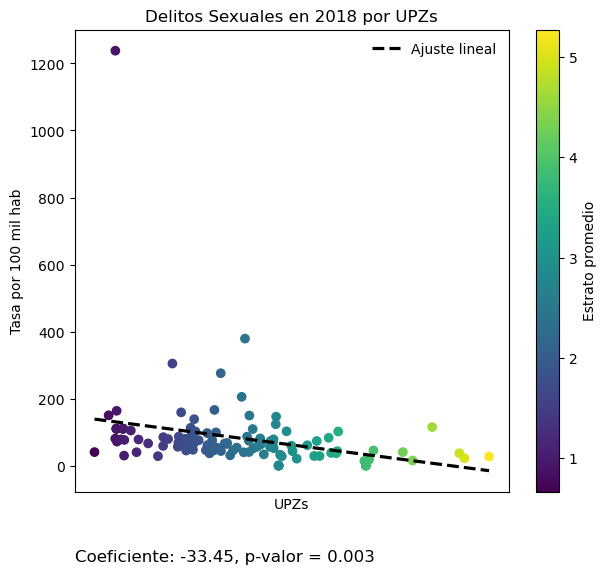

In [162]:
# GRAFICAR
# Remover UPZs y graficarlas
graph(df=df_upz, 
      x='ESTRATO_mean', y=Ys[0], title='Delitos Sexuales en 2018 por UPZs', xlabel='UPZs',
      ylabel='Tasa por 100 mil hab', colbarlbl='Estrato promedio', filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

### Educación

#### Tasa Deserción

In [149]:
df_upz=df_upz.drop(labels=[104,63,60, 117, 10])

In [151]:
[i for i in df_upz.columns if "T" in i]

['ESTRATO_count',
 'ESTRATO_mean',
 'ESTRATO_median',
 'ESTRATO_stddev',
 'Thombre_UP_oficial',
 'Tmujer_UPZ_oficial',
 'Thombre_UP_nooficial',
 'Tmujer_UPZ_nooficial']

In [190]:
XVARS = [ 'Thombre_UP_oficial','Tmujer_UPZ_oficial', 'Thombre_UP_nooficial', 'Tmujer_UPZ_nooficial']

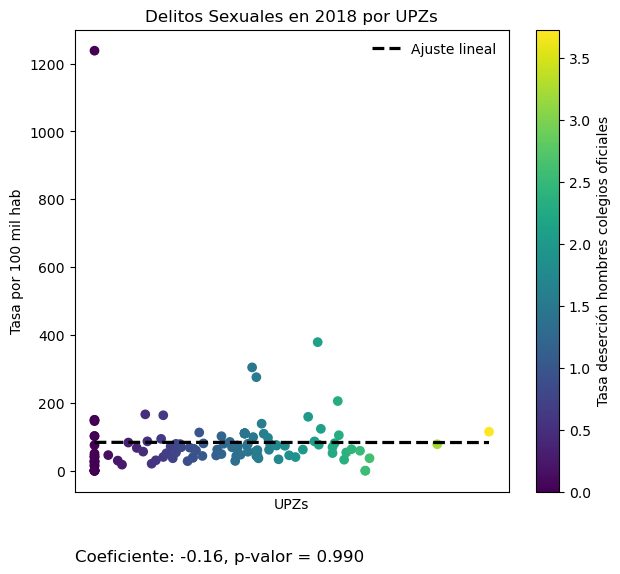

In [191]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción hombres colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

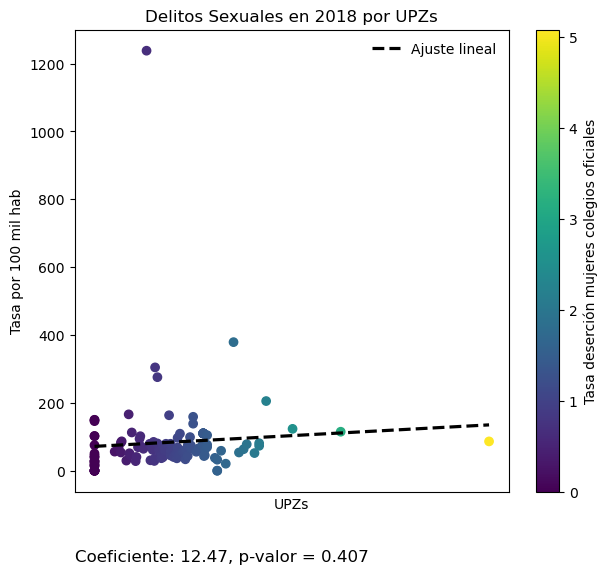

In [192]:
# GRAFICAR
XVAR=XVARS[1]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción mujeres colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

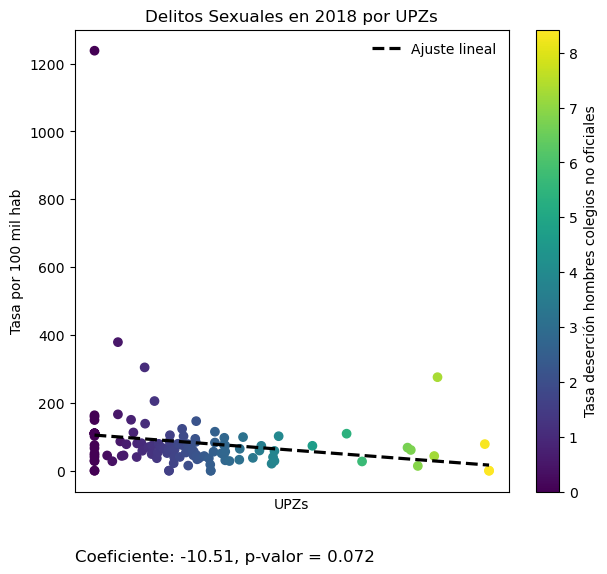

In [193]:
# GRAFICAR
XVAR=XVARS[2]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción hombres colegios no oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

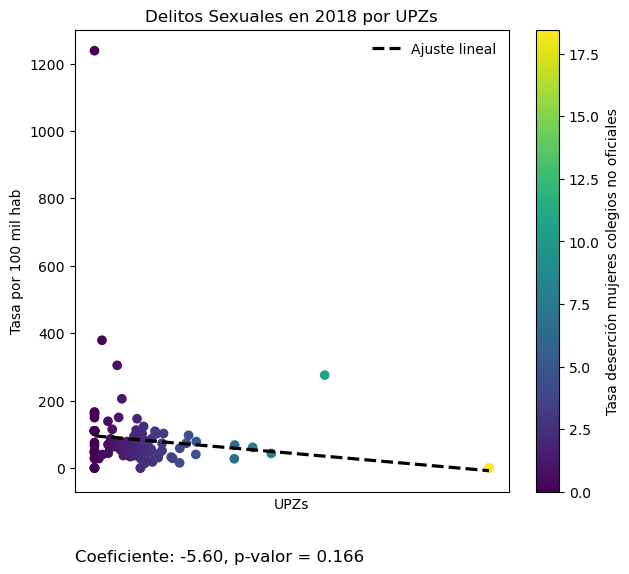

In [194]:
# GRAFICAR
XVAR=XVARS[3]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción mujeres colegios no oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

#### EM: 308B

In [201]:
XVARS=[i for i in df_upz.columns if "308" in i]
XVARS

['308B_prom', '308B_prom_H', '308B_prom_M']

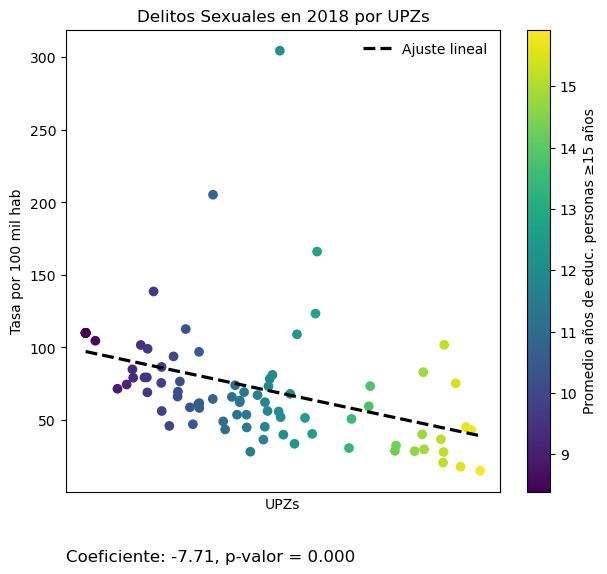

In [202]:
# GRAFICAR
XVAR=XVARS[0]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Promedio años de educ. personas ≥15 años',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

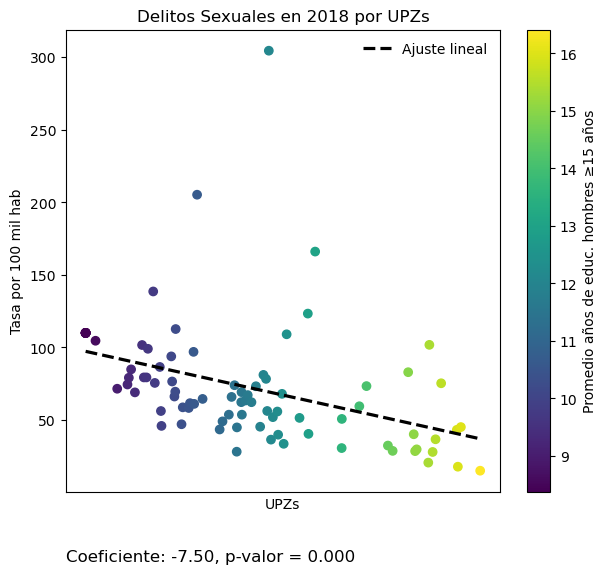

In [204]:
# GRAFICAR
XVAR=XVARS[1]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Promedio años de educ. hombres ≥15 años',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

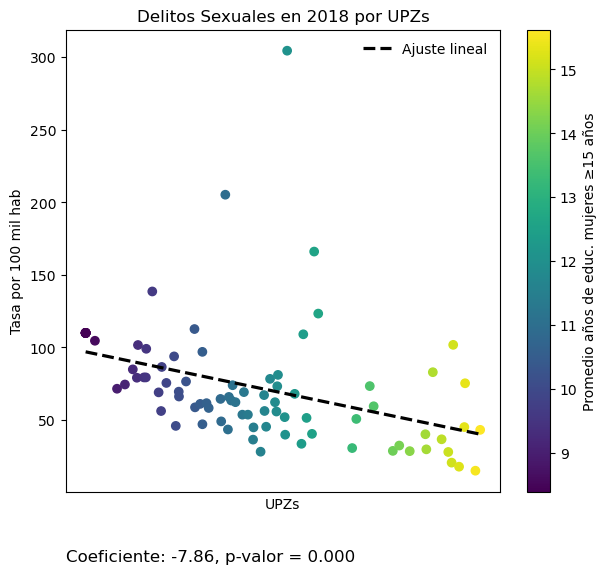

In [205]:
# GRAFICAR
XVAR=XVARS[2]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Promedio años de educ. mujeres ≥15 años',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

#### EM: 309B

In [206]:
XVARS=[i for i in df_upz.columns if "309" in i]
XVARS

['309B_share_bprimaria', '309B_share_bsecundaria']

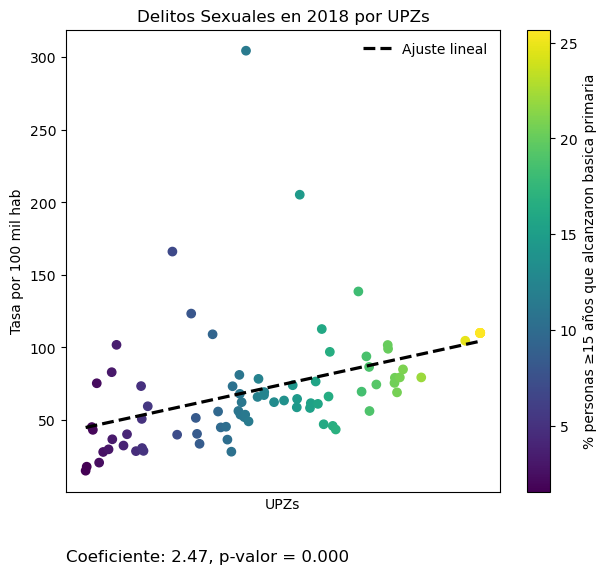

In [207]:
# GRAFICAR
XVAR=XVARS[0]
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% personas ≥15 años que alcanzaron basica primaria',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

309B_share_bsecundaria


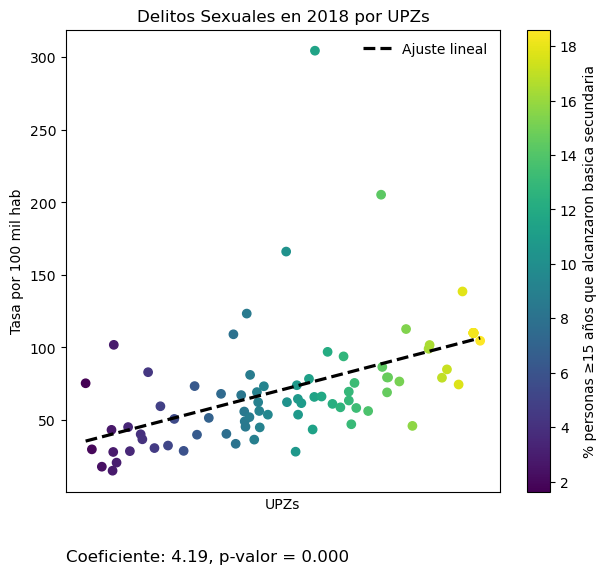

In [209]:
# GRAFICAR
XVAR=XVARS[1]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% personas ≥15 años que alcanzaron basica secundaria',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

### Economía

#### EM 211B

In [210]:
XVARS=[i for i in df_upz.columns if "211" in i]
XVARS

['EM_211B_no', 'EM_211B_solo', 'EM_211B_cubre']

EM_211B_no


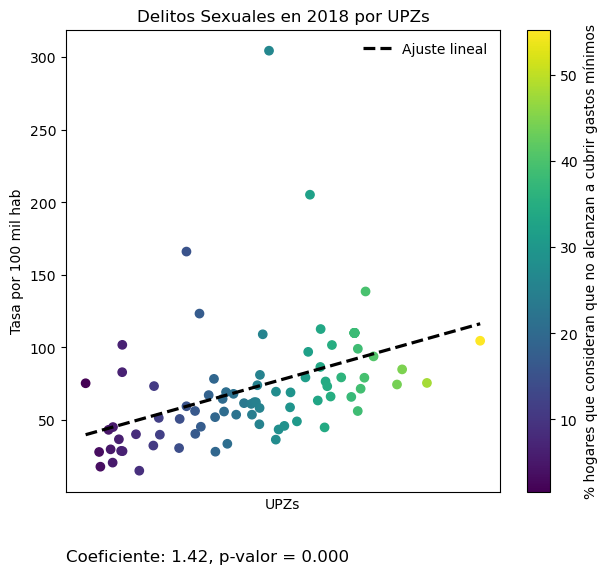

In [211]:
# GRAFICAR
XVAR=XVARS[0]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que consideran que no alcanzan a cubrir gastos mínimos',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_211B_solo


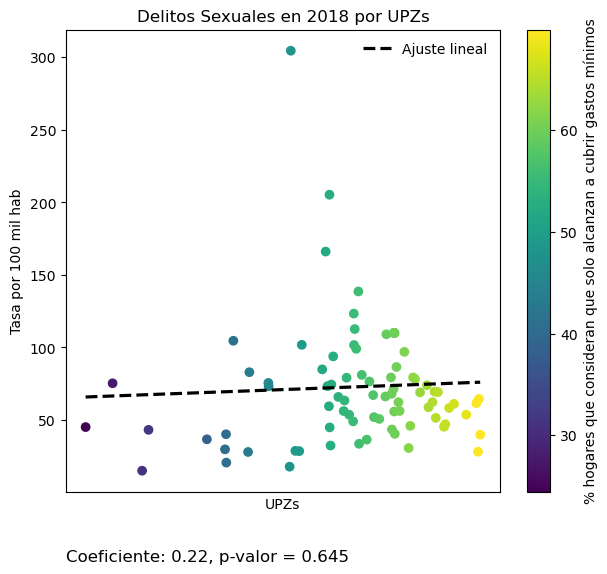

In [212]:
# GRAFICAR
XVAR=XVARS[1]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que consideran que solo alcanzan a cubrir gastos mínimos',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

In [213]:
# GRAFICAR
XVAR=XVARS[2]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que consideran que cubren más que los gastos mínimos',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_211B_cubre


#### EM: 212B: % de hogares que se considera pobre

In [214]:
XVARS=[i for i in df_upz.columns if "212" in i]
XVARS

['EM_212B_si', 'EM_212B_no']

EM_212B_si


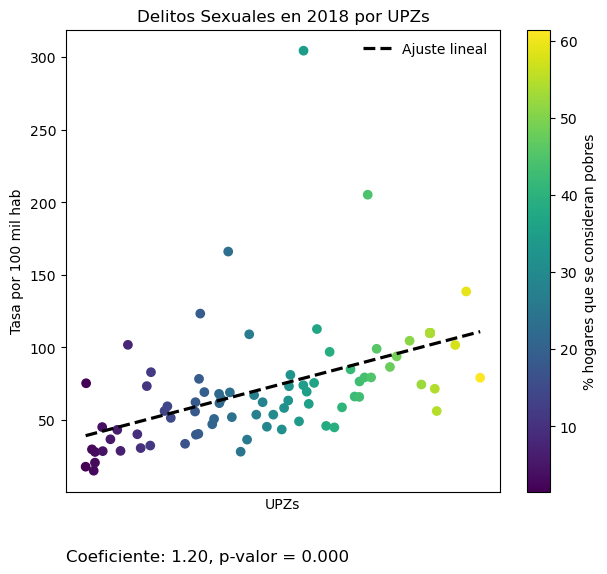

In [215]:
# GRAFICAR
XVAR=XVARS[0]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que se consideran pobres',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_212B_no


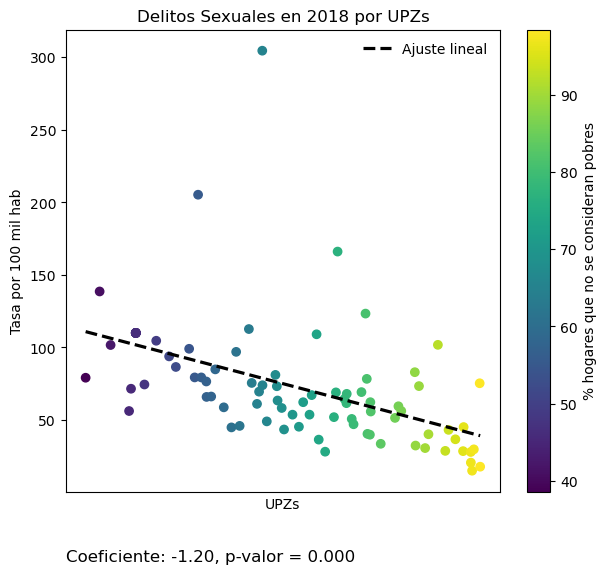

In [217]:
# GRAFICAR
XVAR=XVARS[1]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que no se consideran pobres',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

#### EM 213B: Dificultades covid

In [218]:
XVARS=[i for i in df_upz.columns if "213" in i]
XVARS

['EM_213B_none']

In [219]:
# GRAFICAR
XVAR=XVARS[0]
print(XVAR)
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Delitos Sexuales en 2018 por UPZs', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que no tomó medidas para hacer frente a efectos del covid',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_213B_none


####  mover

In [31]:
XVAR ="rpredial_2019_dZ"
# Produzco gráficos para los delitos en 2019
# [i for i in df_scatastral.columns if ("tasa" in i)]
Ys=[i for i in df_scatastral.columns if ("2019" in i) and ("tasa" in i)]
Ys

['tasa_hurto_a_personas_2019',
 'tasa_hurto_automotores_2019',
 'tasa_hurto_motocicletas_2019',
 'tasa_hurto_comercios_2019']

******************************************************************************
******************************************************************************
# 3. Homicidios

In [295]:
s_delito = 'homicidios'
Ys=[i for i in df_upz.columns if (f"{s_delito}" in i) and ('tasa' in i)]
Ys

['tasa_homicidios_2018',
 'tasa_homicidios_2019',
 'tasa_homicidios_2020',
 'tasa_homicidios_2021']

## Sector Catastral

In [221]:
unidad = "scatastral"

In [248]:
df_scatastral.columns

Index(['SCACODIGO', 'SCATIPO', 'SCANOMBRE_x', 'SHAPE_Leng', 'SHAPE_Area',
       'ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_stddev',
       'pob_scatastral_2018', 'pob_scatastral_2019', 'pob_scatastral_2020',
       'pob_scatastral_2021', 'pob_scatastral_2022', 'pob_scatastral_2023',
       'pob_scatastral_2024', 'delitos_sexuales_2018',
       'tasa_delitos_sexuales_2018', 'homicidios_2018', 'tasa_homicidios_2018',
       'homicidios_2019', 'tasa_homicidios_2019', 'homicidios_2020',
       'tasa_homicidios_2020', 'homicidios_2021', 'tasa_homicidios_2021',
       'violencia_intrafamiliar_2018', 'tasa_violencia_intrafamiliar_2018',
       'hurto_a_personas_2018', 'tasa_hurto_a_personas_2018',
       'hurto_a_personas_2019', 'tasa_hurto_a_personas_2019',
       'hurto_a_personas_2020', 'tasa_hurto_a_personas_2020',
       'hurto_a_personas_2021', 'tasa_hurto_a_personas_2021',
       'hurto_a_residencias_2018', 'tasa_hurto_a_residencias_2018',
       'hurto_automotores_2018', 'tasa_hurto_a

### Recaudo predial 2019

In [240]:
XVARS=[i for i in df_scatastral.columns if "rp" in i]
XVARS

['rpredial_2019', 'rpredial_2019_d', 'rpredial_2019_dZ']

In [256]:
df_scatastral.sort_values(by=Ys[1], ascending=False)[['SCANOMBRE_x','SCACODIGO',Ys[1],'pob_scatastral_2019']].head()

SCANOMBRE_x SCACODIGO  tasa_homicidios_2019  \
629   EL MOCHUELO II URBANO    002598              36363.64   
814             LA FAVORITA    006104                673.76   
248                SANTA FE    006103                531.91   
259             ARRAYANES I    002601                471.70   
1127            ARRAYANES V    002625                471.70   

      pob_scatastral_2019  
629                  11.0  
814                2820.0  
248                2820.0  
259                 212.0  
1127                212.0

In [281]:
# Eliminar "EL MOCHUELO II URBANO" que tiene 11 personas en 2019
df_scatastral=df_scatastral.set_index('SCACODIGO')
df_scatastral=df_scatastral.drop(labels='002598')


In [293]:
# GRAFICAR
XVAR=XVARS[1]
print(XVAR, Ys[1])
graph(df=df_scatastral, 
      x=XVAR, y=Ys[1], 
      title='Tasa homicidios en 2019 por Sector Catastral',
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Recaudo predial por área',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

rpredial_2019_d tasa_homicidios_2019


rpredial_2019_dZ tasa_homicidios_2019


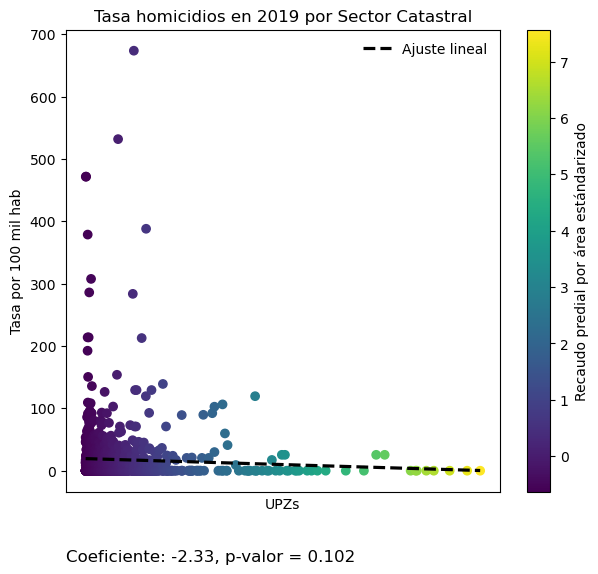

In [294]:
# GRAFICAR
XVAR=XVARS[2]
print(XVAR, Ys[1])
graph(df=df_scatastral, 
      x=XVAR, y=Ys[1], 
      title='Tasa homicidios en 2019 por Sector Catastral', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Recaudo predial por área (estándarizado)',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

## UPZ

In [286]:
unidad = "upz"

### Estrato

In [287]:
[i for i in df_upz.columns if ("ESTRATO" in i)]

['ESTRATO_count', 'ESTRATO_mean', 'ESTRATO_stddev']

In [298]:
# GRAFICAR
XVAR='ESTRATO_mean'
print(XVAR, Ys[0])
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Tasa homicidios en 2018 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

ESTRATO_mean tasa_homicidios_2018


ESTRATO_mean tasa_homicidios_2019


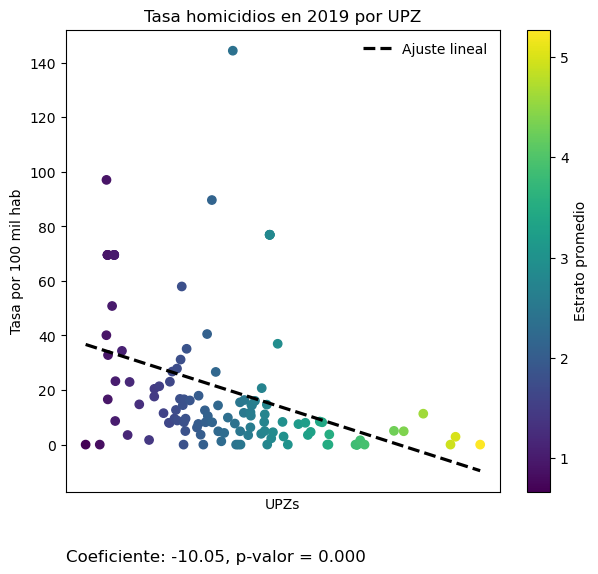

In [301]:
# GRAFICAR
XVAR='ESTRATO_mean'
year=2019
print(XVAR, Ys[1])
graph(df=df_upz, 
      x=XVAR, y=Ys[1], 
      title='Tasa homicidios en 2019 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

In [302]:
# GRAFICAR
XVAR='ESTRATO_mean'
year=2020
print(XVAR, Ys[2])
graph(df=df_upz, 
      x=XVAR, y=Ys[2], 
      title='Tasa homicidios en 2020 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

ESTRATO_mean tasa_homicidios_2020


ESTRATO_mean tasa_homicidios_2021 
 homicidios_upz_ESTRATO_mean_2021


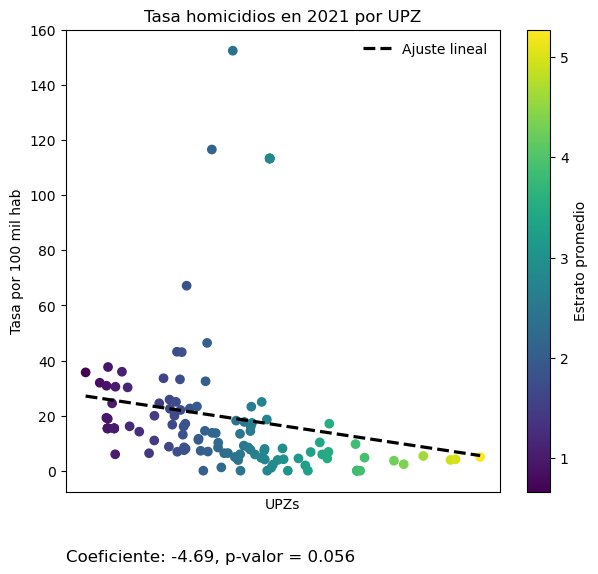

In [305]:
# GRAFICAR
XVAR='ESTRATO_mean'
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

### Educación

#### Tasa deserción

In [308]:
XVARS=[i for i in df_upz.columns if "oficial" in i]

Thombre_UP_oficial tasa_homicidios_2021 
 homicidios_upz_Thombre_UP_oficial_2021


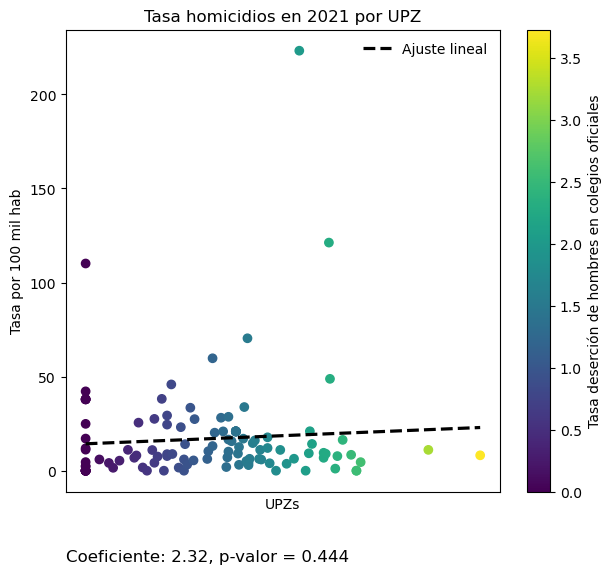

In [311]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[2], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción de hombres en colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

In [313]:
# GRAFICAR
XVAR=XVARS[1]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[2], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción de mujeres en colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

Tmujer_UPZ_oficial tasa_homicidios_2021 
 homicidios_upz_Tmujer_UPZ_oficial_2021


Thombre_UP_nooficial tasa_homicidios_2021 
 homicidios_upz_Thombre_UP_nooficial_2021


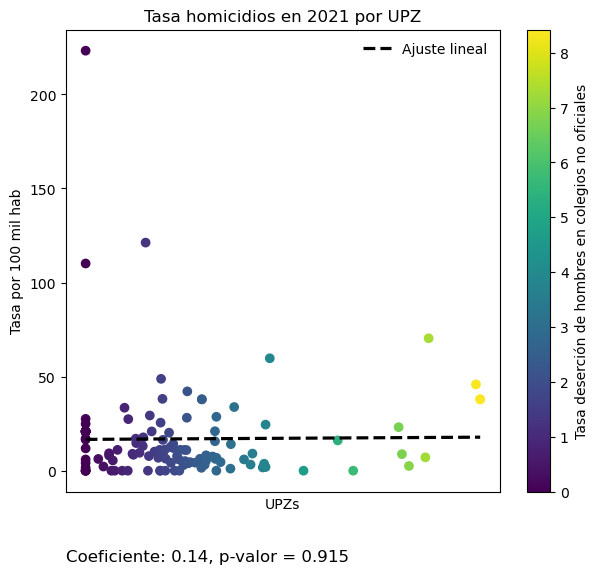

In [316]:
# GRAFICAR
XVAR=XVARS[2]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[2], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción de hombres en colegios no oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

Tmujer_UPZ_nooficial tasa_homicidios_2021 
 homicidios_upz_Tmujer_UPZ_nooficial_2021


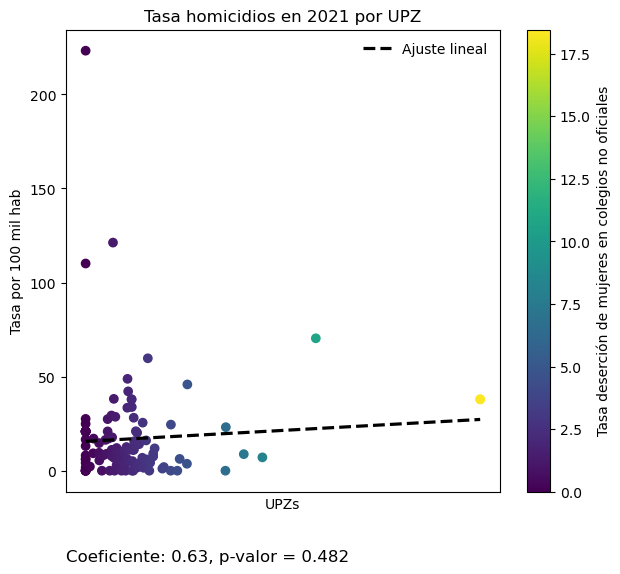

In [318]:
# GRAFICAR
XVAR=XVARS[3]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[2], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción de mujeres en colegios no oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

#### EM 308B

In [319]:
XVARS=[i for i in df_upz.columns if "308" in i]
XVARS

['308B_prom', '308B_prom_H', '308B_prom_M']

In [326]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Promedio años de educ. personas ≥15 años',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

308B_prom tasa_homicidios_2021 
 homicidios_upz_308B_prom_2021


In [327]:
# GRAFICAR
XVAR=XVARS[1]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Promedio años de educ. hombres ≥15 años',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

308B_prom_H tasa_homicidios_2021 
 homicidios_upz_308B_prom_H_2021


In [328]:
# GRAFICAR
XVAR=XVARS[2]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Promedio años de educ. mujeres ≥15 años',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

308B_prom_M tasa_homicidios_2021 
 homicidios_upz_308B_prom_M_2021


#### EM 309B

In [329]:
XVARS=[i for i in df_upz.columns if "309" in i]
XVARS

['309B_share_bprimaria', '309B_share_bsecundaria']

In [333]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% personas ≥15 años con basica primaria como \n máximo nivel alcanzado',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

309B_share_bprimaria tasa_homicidios_2021 
 homicidios_upz_309B_share_bprimaria_2021


309B_share_bsecundaria tasa_homicidios_2021 
 homicidios_upz_309B_share_bsecundaria_2021


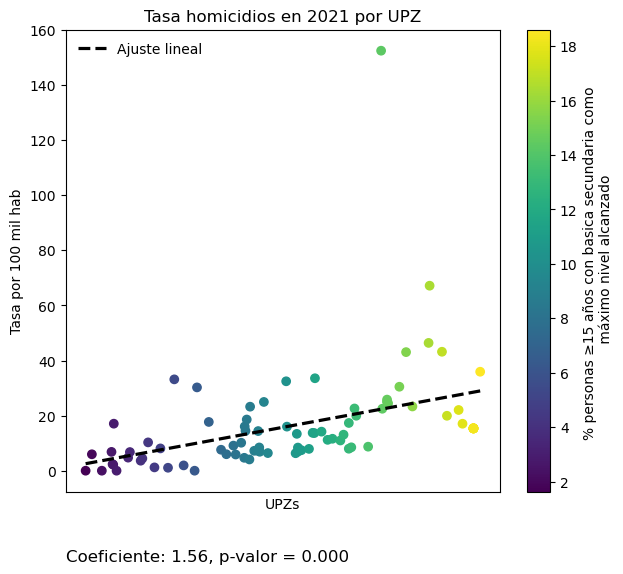

In [335]:
# GRAFICAR
XVAR=XVARS[1]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% personas ≥15 años con basica secundaria como \n máximo nivel alcanzado',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

#### EM 211B

### Economía

#### EM 211B

In [336]:
XVARS=[i for i in df_upz.columns if "211" in i]
XVARS

['EM_211B_no', 'EM_211B_solo', 'EM_211B_cubre']

EM_211B_no tasa_homicidios_2021 
 homicidios_upz_EM_211B_no_2021


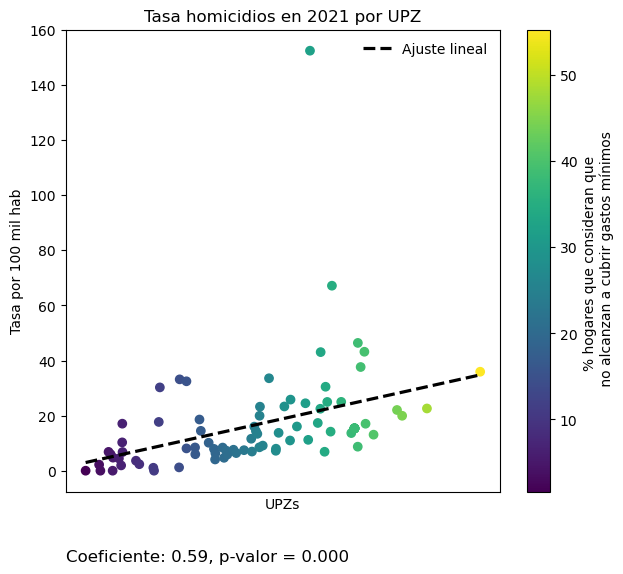

In [338]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que consideran que \n no alcanzan a cubrir gastos mínimos',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_211B_solo tasa_homicidios_2021 
 homicidios_upz_EM_211B_solo_2021


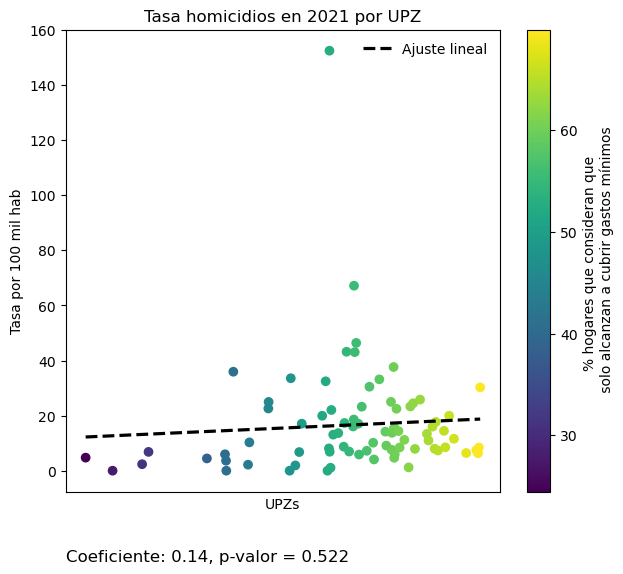

In [340]:
# GRAFICAR
XVAR=XVARS[1]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que consideran que \n solo alcanzan a cubrir gastos mínimos',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

In [342]:
# GRAFICAR
XVAR=XVARS[2]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que consideran que cubren más que los gastos mínimos',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_211B_cubre tasa_homicidios_2021 
 homicidios_upz_EM_211B_cubre_2021


#### EM 212B

In [343]:
XVARS=[i for i in df_upz.columns if "212" in i]
XVARS

['EM_212B_si', 'EM_212B_no']

EM_212B_si tasa_homicidios_2021 
 homicidios_upz_EM_212B_si_2021


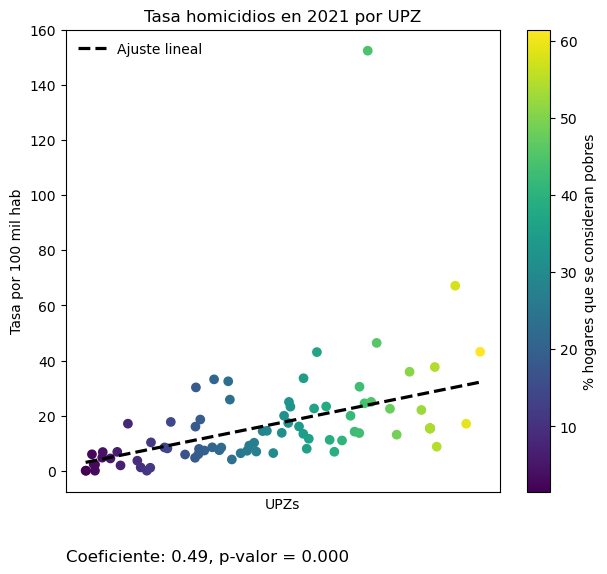

In [346]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que se consideran pobres',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

EM_212B_no tasa_homicidios_2021 
 homicidios_upz_EM_212B_no_2021


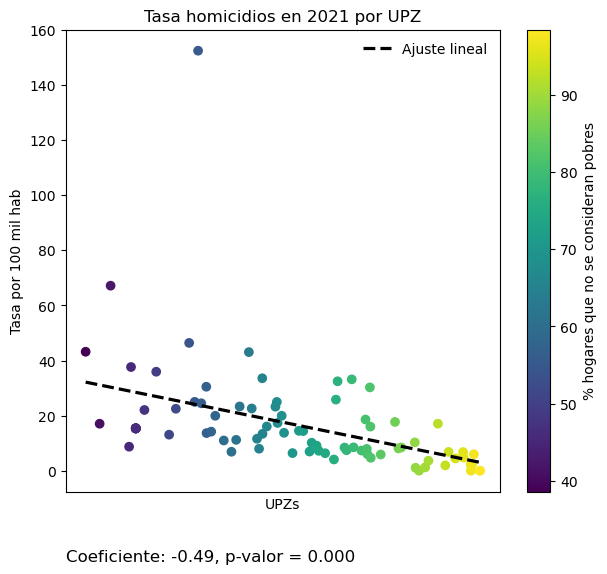

In [348]:
# GRAFICAR
XVAR=XVARS[1]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que no se consideran pobres',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

#### EM 213B

In [349]:
XVARS=[i for i in df_upz.columns if "213" in i]
XVARS

['EM_213B_none']

EM_213B_none tasa_homicidios_2021 
 homicidios_upz_EM_213B_none_2021


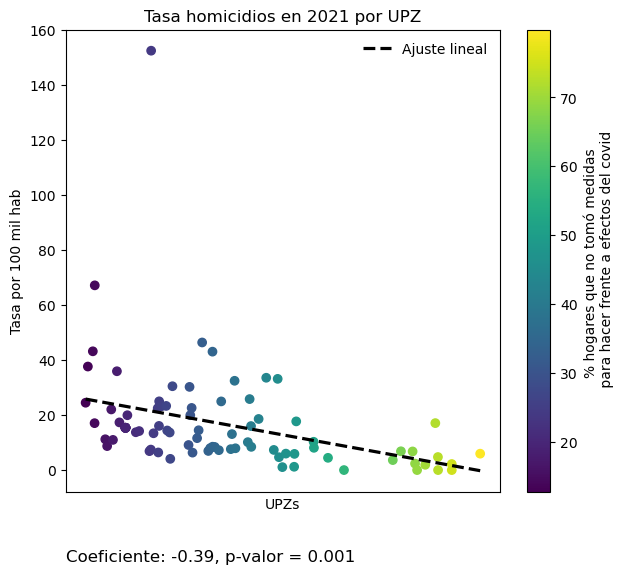

In [351]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Tasa homicidios en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='% hogares que no tomó medidas \n para hacer frente a efectos del covid',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

**********************************************************************
**********************************************************************
# 4. Violencia intrafamiliar

In [354]:
s_delito = 'violencia_intrafamiliar'
Ys=[i for i in df_upz.columns if (f"{s_delito}" in i) and ('tasa' in i)]
Ys

['tasa_violencia_intrafamiliar_2018']

## Sector Catastral

Los datos de violencia intrafamiliar solo los tenemos para el 2018, por lo que no los podemos usar para visualizar la relación con el reccaudo del 2019.

In [352]:
unidad = "scatastral"

### Recaudo Predial

## UPZ

### Estrato

In [355]:
unidad = "upz"

In [358]:
XVARS=[i for i in df_upz.columns if ("ESTRATO_mean" in i)]

In [364]:
# GRAFICAR
XVAR=XVARS[0]
year=2018
print(XVAR, Ys[0], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Tasa homicidios en 2018 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción de hombres en colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

ESTRATO_mean tasa_violencia_intrafamiliar_2018 
 violencia_intrafamiliar_upz_ESTRATO_mean_2018


### Educación

#### Tasa deserción
No se puede usar pues solo se tiene para el 2021 y la violencia intrafamiliar se tiene registrada únicamente para el 2018.

#### EM: 308B
No se puede usar pues solo se tiene para el 2021 y la violencia intrafamiliar se tiene registrada únicamente para el 2018.

#### EM: 309B
No se puede usar pues solo se tiene para el 2021 y la violencia intrafamiliar se tiene registrada únicamente para el 2018.

# 6. Hurto a personas

In [379]:
s_delito = 'hurto_a_personas'
Ys=[i for i in df_upz.columns if (f"{s_delito}" in i) and ('tasa' in i)]
Ys

['tasa_hurto_a_personas_2018',
 'tasa_hurto_a_personas_2019',
 'tasa_hurto_a_personas_2020',
 'tasa_hurto_a_personas_2021']

## Sector Catastral

In [370]:
unidad = "scatastral"

### Recaudo Predial

In [380]:
XVARS=[i for i in df_scatastral.columns if "rp" in i]
XVARS

['rpredial_2019', 'rpredial_2019_d', 'rpredial_2019_dZ']

rpredial_2019_d tasa_hurto_a_personas_2019


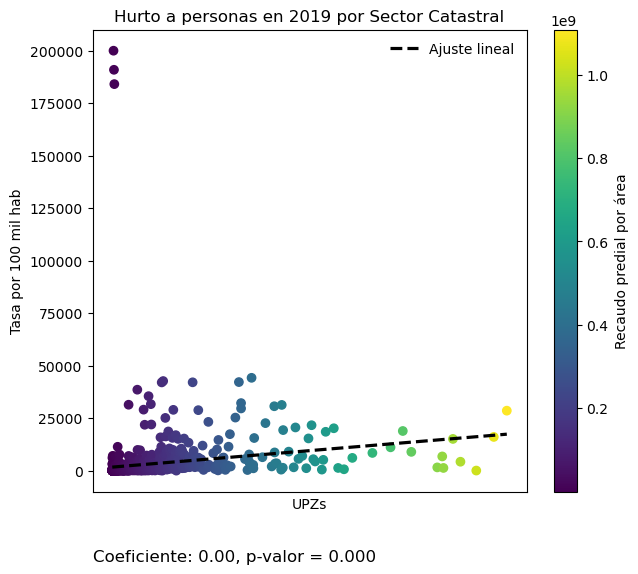

In [381]:
# GRAFICAR
XVAR=XVARS[1]
print(XVAR, Ys[1])
graph(df=df_scatastral, 
      x=XVAR, y=Ys[1], 
      title='Hurto a personas en 2019 por Sector Catastral',
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Recaudo predial por área',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

rpredial_2019_dZ tasa_hurto_a_personas_2019


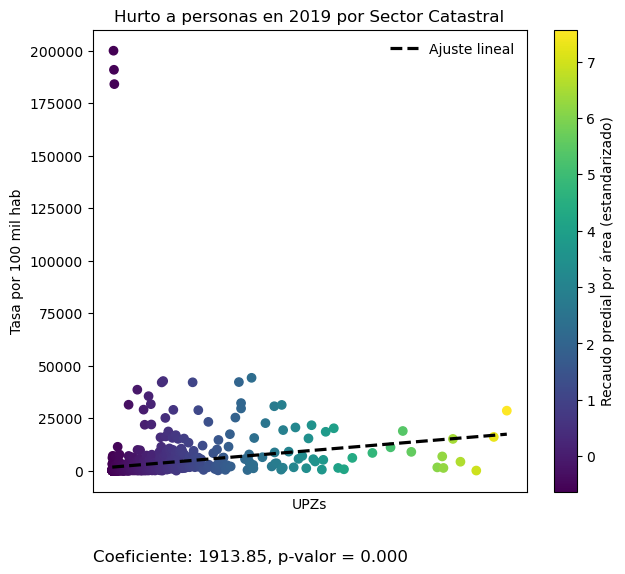

In [382]:
# GRAFICAR
XVAR=XVARS[2]
print(XVAR, Ys[1])
graph(df=df_scatastral, 
      x=XVAR, y=Ys[1], 
      title='Hurto a personas en 2019 por Sector Catastral',
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Recaudo predial por área (estandarizado)',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

## UPZ

In [397]:
unidad="upz"

### Estrato

In [398]:
XVARS=[i for i in df_upz.columns if ("ESTRATO_mean" in i)]
XVARS

['ESTRATO_mean']

ESTRATO_mean tasa_hurto_a_personas_2018 
 hurto_a_personas_upz_ESTRATO_mean_2018


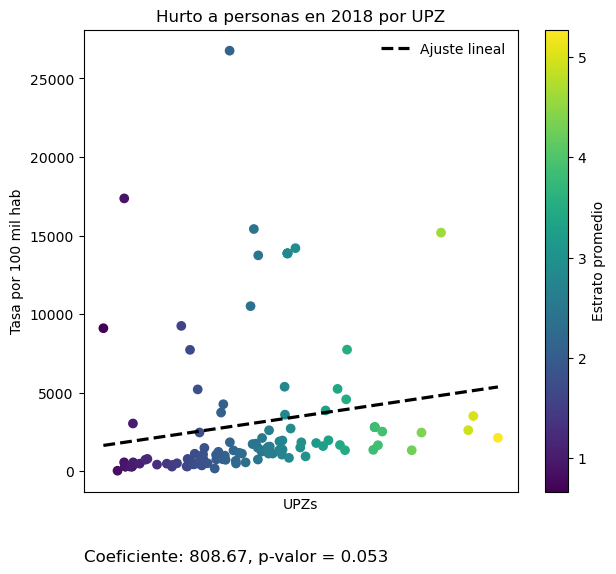

In [399]:
# GRAFICAR
XVAR=XVARS[0]
year=2018
print(XVAR, Ys[0], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[0], 
      title='Hurto a personas en 2018 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

In [400]:
# GRAFICAR
XVAR=XVARS[0]
year=2019
print(XVAR, Ys[1], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[1], 
      title='Hurto a personas en 2019 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

ESTRATO_mean tasa_hurto_a_personas_2019 
 hurto_a_personas_upz_ESTRATO_mean_2019


In [401]:
# GRAFICAR
XVAR=XVARS[0]
year=2020
print(XVAR, Ys[2], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[2], 
      title='Hurto a personas en 2020 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

ESTRATO_mean tasa_hurto_a_personas_2020 
 hurto_a_personas_upz_ESTRATO_mean_2020


ESTRATO_mean tasa_hurto_a_personas_2021 
 hurto_a_personas_upz_ESTRATO_mean_2021


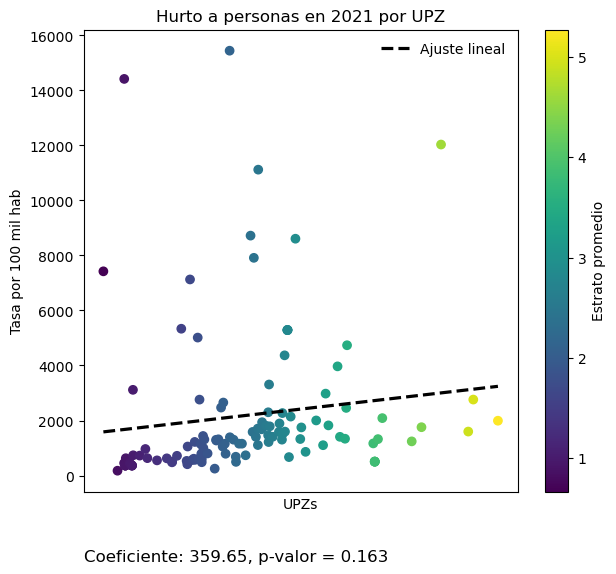

In [402]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Hurto a personas en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Estrato promedio',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

### Educación

#### Tasa deserción

In [403]:
XVARS=[i for i in df_upz.columns if "oficial" in i]
XVARS


['Thombre_UP_oficial',
 'Tmujer_UPZ_oficial',
 'Thombre_UP_nooficial',
 'Tmujer_UPZ_nooficial']

Thombre_UP_oficial tasa_hurto_a_personas_2021 
 hurto_a_personas_upz_Thombre_UP_oficial_2021


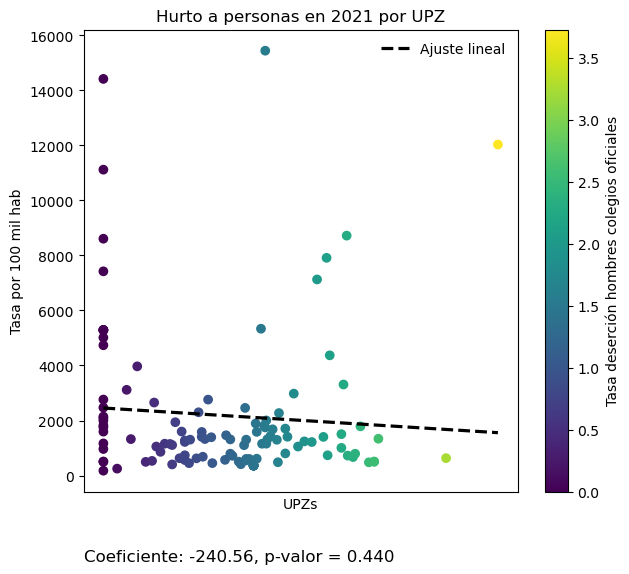

In [404]:
# GRAFICAR
XVAR=XVARS[0]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Hurto a personas en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción hombres colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

Tmujer_UPZ_oficial tasa_hurto_a_personas_2021 
 hurto_a_personas_upz_Tmujer_UPZ_oficial_2021


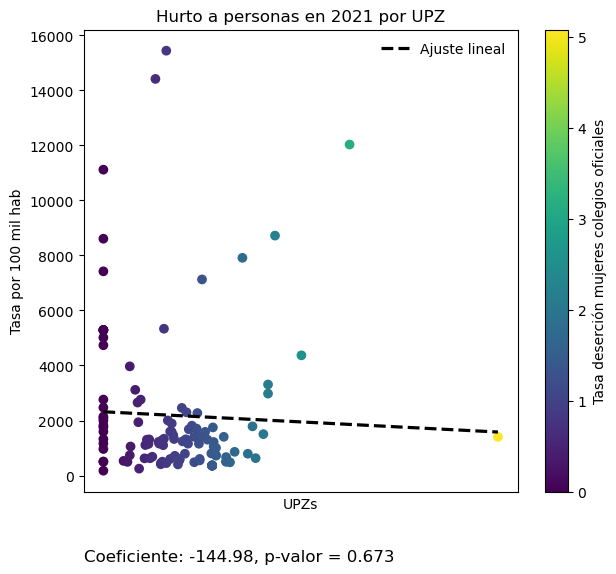

In [405]:
# GRAFICAR
XVAR=XVARS[1]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Hurto a personas en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción mujeres colegios oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

Thombre_UP_nooficial tasa_hurto_a_personas_2021 
 hurto_a_personas_upz_Thombre_UP_nooficial_2021


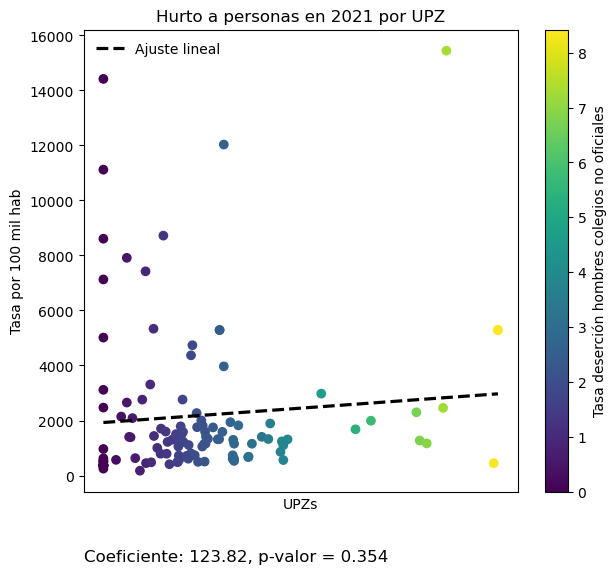

In [408]:
# GRAFICAR
XVAR=XVARS[2]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Hurto a personas en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción hombres colegios no oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

In [409]:
# GRAFICAR
XVAR=XVARS[3]
year=2021
print(XVAR, Ys[3], "\n", f"{s_delito}_{unidad}_{XVAR}_{year}")
graph(df=df_upz, 
      x=XVAR, y=Ys[3], 
      title='Hurto a personas en 2021 por UPZ', 
      xlabel='UPZs', ylabel='Tasa por 100 mil hab', 
      colbarlbl='Tasa deserción mujeres colegios no oficiales',
      filename=f"{s_delito}_{unidad}_{XVAR}_{year}")

Tmujer_UPZ_nooficial tasa_hurto_a_personas_2021 
 hurto_a_personas_upz_Tmujer_UPZ_nooficial_2021


### Economía

# 7. Hurto a residencias

# 8. Hurto de automotores 

# 9. Hurto de motocicletas

# 10. Hurto a comercios